In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import os, fnmatch
import MyFunctions as mf

### Load causal network coeffcients

In [2]:
parent_path = '/home/jmindlin/work_folders/Amon_Omon_recipe_allmodels_allmembers_additional_models_u850_sst_pr_tas_psl_20230529_080043'
preproc_path = parent_path+'/preproc'
ruta = preproc_path+'/multiple_regression_indices/tos_cp'
tos_cp_index = mf.cargo_datos_rd(ruta,'tos')
ruta = preproc_path+'/multiple_regression_indices/ua50_spv'
ua50_spv_index = mf.cargo_datos_rd(ruta,'ua')
ruta = preproc_path+'/multiple_regression_indices//ta'
ta_index = mf.cargo_datos_rd(ruta,'ta')
ruta = preproc_path+'/multiple_regression_indices/gw'
gw_index = mf.cargo_datos_rd(ruta,'tas')

In [3]:
time = gw_index['ACCESS-CM2']['EnsembleMean'].time
for model in gw_index.keys():
    gw_index[model]['EnsembleMean']['time'] = time 

time = ta_index['ACCESS-CM2']['EnsembleMean'].time
for model in gw_index.keys():
    ta_index[model]['EnsembleMean']['time'] = time 

time = ua50_spv_index['ACCESS-CM2']['EnsembleMean'].time
for model in gw_index.keys():
    ua50_spv_index[model]['EnsembleMean']['time'] = time
     
time = tos_cp_index['ACCESS-CM2']['EnsembleMean'].time
for model in gw_index.keys():
    tos_cp_index[model]['EnsembleMean']['time'] = time 

In [4]:
work_path =  '/home/jmindlin/work_folders/Amon_Omon_recipe_allmodels_allmembers_additional_models_u850_sst_pr_tas_psl_20230529_080043/work'
ruta = work_path+'/multiple_regression_indices/multiple_regresion/u850_1900_2022'
regression_tos_cp_on_jet = mf.cargo_regression_coefs(ruta,'tos_cp')
regression_ta_on_jet = mf.cargo_regression_coefs(ruta,'ta')
regression_spv_on_jet = mf.cargo_regression_coefs(ruta,'ua50_spv')
regression_gw_on_jet = mf.cargo_regression_coefs(ruta,'gw')
regression_clim_jet = mf.cargo_regression_coefs(ruta,'clim')

{'MIROC6', 'MCM-UA-1-0', 'MPI-ESM1-2-HR', 'IPSL-CM6A-LR', 'CMCC-CM2-SR5', 'KACE-1-0-G', 'TaiESM1', 'GISS-E2-1-H', 'CESM2-WACCM', 'CMCC-ESM2', 'INM-CM4-8', 'MRI-ESM2-0', 'MPI-ESM1-2-LR', 'CanESM5', 'NorESM2-LM', 'HadGEM3-GC31-MM', 'FIO-ESM-2-0', 'NESM3', 'ACCESS-CM2', 'IITM-ESM', 'HadGEM3-GC31-LL', 'NorESM2-MM', 'CAMS-CSM1-0', 'CESM2', 'MIROC-ES2L', 'FGOALS-g3', 'E3SM-1-0', 'CIESM', 'CNRM-ESM2-1', 'INM-CM5-0', 'BCC-CSM2-MR', 'CAS-ESM2-0', 'EC-Earth3', 'CNRM-CM6-1', 'ACCESS-ESM1-5', 'UKESM1-0-LL', 'GISS-E2-1-G'}
{'MIROC6', 'MCM-UA-1-0', 'MPI-ESM1-2-HR', 'IPSL-CM6A-LR', 'CMCC-CM2-SR5', 'KACE-1-0-G', 'TaiESM1', 'GISS-E2-1-H', 'CESM2-WACCM', 'CMCC-ESM2', 'INM-CM4-8', 'MRI-ESM2-0', 'MPI-ESM1-2-LR', 'CanESM5', 'NorESM2-LM', 'HadGEM3-GC31-MM', 'FIO-ESM-2-0', 'NESM3', 'ACCESS-CM2', 'IITM-ESM', 'HadGEM3-GC31-LL', 'NorESM2-MM', 'CAMS-CSM1-0', 'CESM2', 'MIROC-ES2L', 'FGOALS-g3', 'E3SM-1-0', 'CIESM', 'CNRM-ESM2-1', 'INM-CM5-0', 'BCC-CSM2-MR', 'CAS-ESM2-0', 'EC-Earth3', 'CNRM-CM6-1', 'ACCESS-ESM1-5'

In [5]:
mean_tos_cp_on_jet = [regression_tos_cp_on_jet[model]['EnsembleMean'] for model in regression_tos_cp_on_jet.keys()]
MEM = xr.concat(mean_tos_cp_on_jet,dim='model')
MEM_tos_cp_on_jet = MEM.mean(dim="model")
del MEM
mean_ta_on_jet = [regression_ta_on_jet[model]['EnsembleMean'] for model in regression_tos_cp_on_jet.keys()]
MEM = xr.concat(mean_ta_on_jet,dim='model')
MEM_ta_on_jet = MEM.mean(dim="model")
del MEM
mean_spv_on_jet = [regression_spv_on_jet[model]['EnsembleMean'] for model in regression_tos_cp_on_jet.keys()]
MEM = xr.concat(mean_spv_on_jet,dim='model')
MEM_spv_on_jet = MEM.mean(dim="model")
del MEM
mean_gw_on_jet = [regression_gw_on_jet[model]['EnsembleMean'] for model in regression_tos_cp_on_jet.keys()]
MEM = xr.concat(mean_gw_on_jet,dim='model')
MEM_gw_on_jet = MEM.mean(dim="model")
del MEM
mean_clim_jet = [regression_clim_jet[model]['EnsembleMean'] for model in regression_tos_cp_on_jet.keys()]
MEM = xr.concat(mean_clim_jet,dim='model')
MEM_clim_jet = MEM.mean(dim="model")
del MEM

In [6]:
multimodel_tos_cp = [regression_tos_cp_on_jet[m]['EnsembleMean'] for m in  regression_tos_cp_on_jet.keys()]
multimodel_tos_cp = xr.concat(multimodel_tos_cp,dim='model')

multimodel_ta = [regression_ta_on_jet[m]['EnsembleMean'] for m in  regression_ta_on_jet.keys()]
multimodel_ta = xr.concat(multimodel_ta,dim='model')

multimodel_spv = [regression_spv_on_jet[m]['EnsembleMean'] for m in  regression_spv_on_jet.keys()]
multimodel_spv = xr.concat(multimodel_spv,dim='model')

multimodel_gw = [regression_gw_on_jet[m]['EnsembleMean'] for m in  regression_gw_on_jet.keys()]
multimodel_gw = xr.concat(multimodel_gw,dim='model')

mean_driver_responses = {}; std_driver_responses = {};pval_responses = {}
mean_driver_responses['Global Warming'] = multimodel_gw.mean(dim="model")
mean_driver_responses['Tropical Warming'] = multimodel_ta.mean(dim="model")
mean_driver_responses['Central Pacific Warming'] = multimodel_tos_cp.mean(dim="model")
mean_driver_responses['Stratospheric Polar Vortex'] = multimodel_spv.mean(dim="model")
std_driver_responses['Global Warming'] = multimodel_gw.std(dim="model")
std_driver_responses['Tropical Warming'] = multimodel_ta.std(dim="model")
std_driver_responses['Central Pacific Warming'] = multimodel_tos_cp.std(dim="model")
std_driver_responses['Stratospheric Polar Vortex'] = multimodel_spv.std(dim="model")

In [7]:
ruta = work_path+'/multiple_regression_indices/multiple_regresion/across_model_regression_historical/ua/regression_coefficients.nc'
ua_coefficients = xr.open_dataset(ruta)
MEM_tos_cp_on_jet = ua_coefficients.tos_cp
MEM_ta_on_jet = ua_coefficients.ta
MEM_gw_on_jet = ua_coefficients.gw
MEM_spv_on_jet = ua_coefficients.ua50_spv

In [8]:
plt.close('all')
eesc_ts = pd.read_csv(parent_path+'/GW_EESC_polar_ozoneloss.csv')

dic_coef_ta = mf.regression_driver_gw(ta_index,gw_index)
coef_ta_mean = [dic_coef_ta[model]['coef'][0] for  model in dic_coef_ta.keys()]
ta_mean = np.mean(np.array(coef_ta_mean))
coef_ta_gw = [dic_coef_ta[model]['coef'][1] for  model in dic_coef_ta.keys() if model != 'GISS-E2-1-G']
coef_ta_gw = np.array(coef_ta_gw)
ta_ts_values = [np.mean(coef_ta_gw) + 1.28*np.std(coef_ta_gw),np.mean(coef_ta_gw) - 1.28*np.std(coef_ta_gw)]

plt.close('all')
dic_coef_tos_cp = mf.regression_driver_gw(tos_cp_index,gw_index)
coef_tos_mean = [dic_coef_tos_cp[model]['coef'][0] for  model in dic_coef_tos_cp.keys()]
tos_mean = np.mean(np.array(coef_tos_mean))
coef_tos_gw = [dic_coef_tos_cp[model]['coef'][1] for  model in dic_coef_tos_cp.keys() if model != 'GISS-E2-1-G']
coef_tos_gw = np.array(coef_tos_gw)
tos_ts_values = [np.mean(coef_tos_gw) + 1.28*np.std(coef_tos_gw),np.mean(coef_tos_gw) - 1.28*np.std(coef_tos_gw)]

plt.close('all')
dic_coef_spv = mf.regression_driver_eesc_gw(ua50_spv_index,gw_index,eesc_ts)
coef_spv_gw = [dic_coef_spv[model]['coef'][2] for  model in dic_coef_spv.keys() if model != 'GISS-E2-1-G']
coef_spv_eesc = [dic_coef_spv[model]['coef'][1] for  model in dic_coef_spv.keys() if model != 'GISS-E2-1-G']
coef_spv_order = np.array([dic_coef_spv[model]['coef'][0] for  model in dic_coef_spv.keys() if model != 'GISS-E2-1-G'])
coef_spv_gw = np.array(coef_spv_gw)
spv_ts_values = [np.mean(coef_spv_gw) + 1.28*np.std(coef_spv_gw),np.mean(coef_spv_gw) - 1.28*np.std(coef_spv_gw),np.mean(coef_spv_eesc)-np.std(coef_spv_eesc),np.mean(coef_spv_order)]

std_coef_ta = []
for model in ta_index.keys():
    members = [np.std(mf.detrend(ta_index[model]['Members'][i].sel(time=slice('1950','2018')).values)) for i in range(len(ta_index[model]['Members']))]
    members = np.array(members)
    std_coef_ta.append(np.std(members))
    
std_coef_tos_cp = []
for model in tos_cp_index.keys():
    members = [np.std(mf.detrend(tos_cp_index[model]['Members'][i].sel(time=slice('1950','2018')).values)) for i in range(len(tos_cp_index[model]['Members']))]
    members = np.array(members)
    std_coef_tos_cp.append(np.std(members))
    
std_coef_spv = []
for model in ua50_spv_index.keys():
    members = [np.std(mf.detrend(ua50_spv_index[model]['Members'][i].sel(time=slice('1950','2018')).values)) for i in range(len(ua50_spv_index[model]['Members']))]
    members = np.array(members)
    std_coef_spv.append(np.std(members))

/home/jmindlin/work_folders/EDJ_causal_network/MyFunctions.py:211: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  eesc_ts['EESC_polar'][i] = eesc_ts['EESC_polar'][8]
/home/jmindlin/work_folders/EDJ_causal_network/MyFunctions.py:211: SettingWi

In [9]:
#Storylines
multimodel_ensemble = [mf.clim_anom(gw_index[model]['EnsembleMean']) for model in gw_index.keys() if model != "GISS-E2-1-G"]
gw_multimodel_ensemble = xr.concat(multimodel_ensemble,dim='model')
gw_multimodel_ensemble_mean = gw_multimodel_ensemble.mean(dim='model')
gw_multimodel_ensemble_std = gw_multimodel_ensemble.std(dim='model')

high_GW = gw_multimodel_ensemble_mean-1.28*gw_multimodel_ensemble_std
low_GW = gw_multimodel_ensemble_mean+1.28*gw_multimodel_ensemble_std


0
1
2


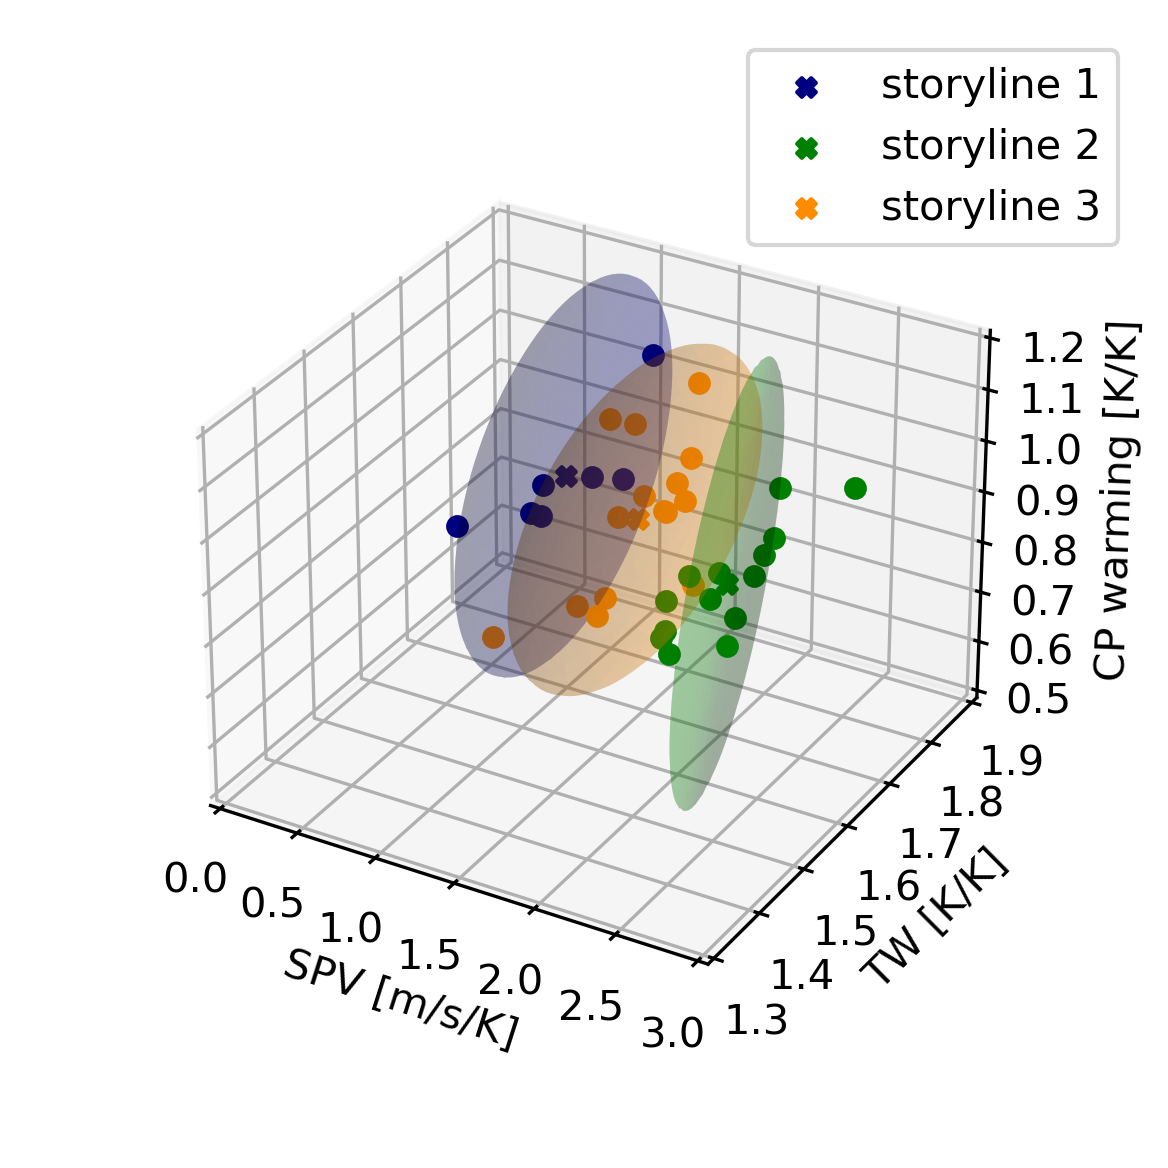

In [10]:
from sklearn import mixture
X = np.array([coef_spv_gw,coef_ta_gw,coef_tos_gw])
gm = mixture.GaussianMixture(n_components=3,covariance_type='full',random_state=0).fit(X.T)
mf.plot_results(X.T,gm.predict(X.T),gm.means_,gm.precisions_, 0, "Gaussian Mixture")

### Test causal network

Load observational and reanalysis data

In [15]:
import os
path_era = parent_path+'/ERA5'
listOfFiles = os.listdir(path_era)
era5 = xr.open_dataset(path_era+'/era5.mon.mean_regrid.nc')
u_1979_2018 = era5.u.isel(lev=30)
u_1950_1978 = xr.open_dataset(path_era+'/ERA5_monthly_u_wind_n36_rename_regrid.nc').u.isel(plev=10)
u_1950_2018 = xr.concat([u_1950_1978,u_1979_2018],'time')
u_DJF = mf.seasonal_data2(u_1950_2018,'DJF')
u_1950_2018_DJF = u_DJF.rename({'year':'time'})
CLIM_jet = u_1950_2018_DJF.sel(time=slice('1950','1969')).mean(dim='time')


In [261]:
u_850_era5 = xr.open_dataset(path_era+'/u_850_mon_mean_T42.nc').isel(expver=0)
u_DJF = mf.seasonal_data2(u_850_era5,'DJF')
del u_850_era5
u_1950_2022_DJF = u_DJF.rename({'year':'time'})
# CLIM_jet = u_1950_2022_DJF.sel(time=slice('1950','1969')).mean(dim='time')

#Observed polar vortex
#spv_1950_2022 = xr.open_dataset(path_era+'/u_50_mon_mean_T42.nc').isel(expver=0).u
#spv_DJF = mf.seasonal_data2(spv_1950_2022,'DJF')
#spv_1950_2018_DJF_large = spv_DJF.rename({'year':'time'})
#spv_1950_2018_DJF = spv_1950_2018_DJF_large.sel(lat=slice(-60,-50)).mean(dim='lat').mean(dim='lon').sel(time=slice('1950','2020'))
#del spv_1950_2022,spv_1950_2018_DJF_large, spv_DJF
#CLIM_spv = spv_1950_2018_DJF.sel(time=slice('1950','1969')).mean(dim='time')

import os
path_era = parent_path+'/ERA5'
listOfFiles = os.listdir(path_era)
era5 = xr.open_dataset(path_era+'/era5.mon.mean_regrid.nc')
u_1979_2018 = era5.u.sel(lev=50)
u_1950_1978 = xr.open_dataset(path_era+'/ERA5_monthly_u_wind_n36_rename_regrid.nc').u.sel(plev=5000)
u_1950_2018 = xr.concat([u_1950_1978,u_1979_2018],'time')
spv_DJF = mf.seasonal_data2(u_1950_2018,'DJF').sel(lat=slice(-60,-50)).mean(dim='lat').mean(dim='lon').sel(year=slice('1950','2020'))
spv_1950_2018_DJF = spv_DJF.rename({'year':'time'})
CLIM_spv = spv_1950_2018_DJF.sel(time=slice('1950','1969')).mean(dim='time')


obs_ta = xr.open_dataset(path_era+'/ta_250_mon_mean_T42.nc').isel(expver=0).t
obs_tw = obs_ta.sel(lat=slice(-15,15)).mean(dim='lat').mean(dim='lon')
anom_tw = obs_tw - obs_tw.mean(dim='time')
del obs_ta
anom_tw = anom_tw.sel(time=slice('1950','2020'))
anom_tw_DJF = mf.seasonal_data2(anom_tw,'DJF')

#SST
path_sst = parent_path+'/sst_data'
obs_sst = xr.open_dataset(path_sst+'/sst.mon.mean_COBE_2022_KAPLAN_grid.nc')
anom_sst = obs_sst - obs_sst.sel(time=slice('1950','1969')).mean(dim='time')
anom_sst_tos_cp_obs = anom_sst.sel(lat=slice(-5,5)).sel(lon=slice(180,250)).mean(dim='lat').mean(dim='lon')
anom_sst_tos_cp_obs = anom_sst_tos_cp_obs.sel(time=slice('1950','2020'))
anom_sst_tos_cp_obs_DJF = mf.seasonal_data2(anom_sst_tos_cp_obs,'DJF')
sst_tos_cp_obs_DJF = mf.seasonal_data2(obs_sst.sel(lat=slice(-5,5)).sel(lon=slice(180,250)).mean(dim='lat').mean(dim='lon').sel(time=slice('1950','2020')),'DJF')
# years = np.arange(1950,2023,1)
# y = regressor_GW(years)
# anom_sst_trend = linear_regression(y,anom_sst_tos_cp_obs_DJF.sst.values)  
# anom_sst_tos_cp_obs_DJF = anom_sst_tos_cp_obs_DJF.sst - anom_sst_trend[0] - anom_sst_trend[1]*years
anom_sst_tos_cp_obs_DJF = sst_tos_cp_obs_DJF

#TAS
path_tas = parent_path+'/HadCRUT5'
obs_tas = xr.open_dataset(path_tas+'/HadCRUT.5.0.2.0.analysis.summary_series.global.monthly.nc').tas_mean
anom_tas = obs_tas 
anom_tas = anom_tas.sel(time=slice('1950','2020'))
anom_tas_DJF = mf.seasonal_data2(anom_tas,'DJF')

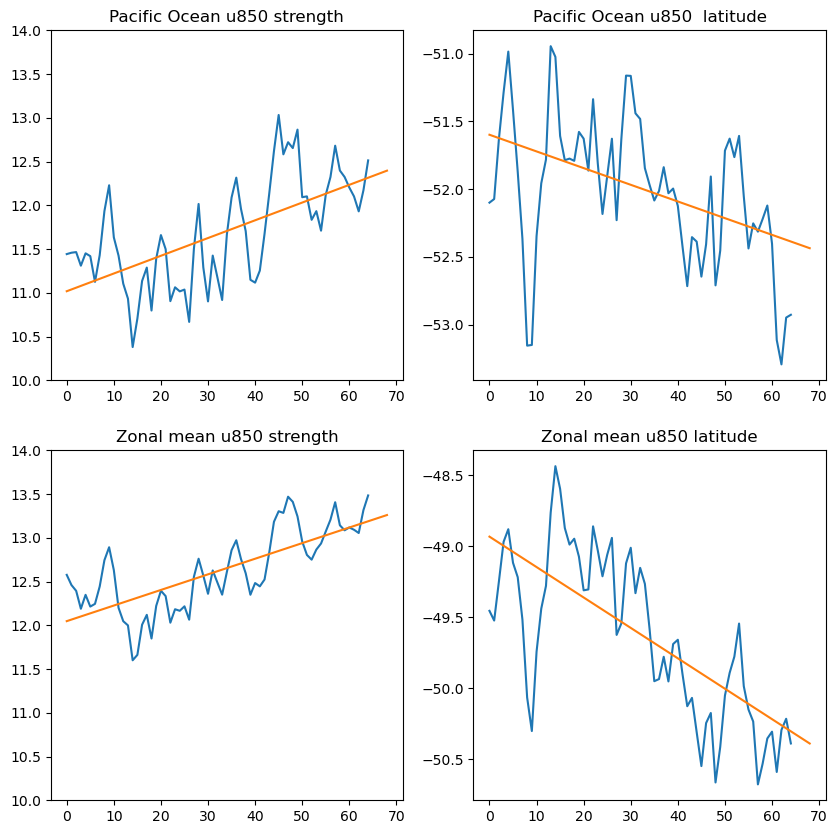

In [18]:
years = np.arange(1950,2019,1)
y = mf.regressor_GW(years)
obs_lat_CP,obs_str_CP = mf.jet_lat_strength(u_1950_2018_DJF)
coef_str_CP = mf.linear_regression(y,obs_str_CP)  
coef_lat_CP = mf.linear_regression(y,obs_lat_CP)  
obs_lat_ZM,obs_str_ZM = mf.jet_lat_strength(u_1950_2018_DJF,0,360)
coef_str_ZM = mf.linear_regression(y,obs_str_ZM)  
coef_lat_ZM = mf.linear_regression(y,obs_lat_ZM)  

plt.figure(figsize=(10,10)) 
ax=plt.subplot(2,2,1)
ax.plot(mf.moving_average(obs_str_CP))
ax.plot(coef_str_CP[0] + coef_str_CP[1]*years)
ax.set_ylim(10,14)
ax.set_title('Pacific Ocean u850 strength')
ax=plt.subplot(2,2,2)
ax.plot(mf.moving_average(obs_lat_CP))
ax.plot(coef_lat_CP[0] + coef_lat_CP[1]*years)
ax.set_title('Pacific Ocean u850  latitude')
ax=plt.subplot(2,2,3)
ax.plot(mf.moving_average(obs_str_ZM))
ax.plot(coef_str_ZM[0] + coef_str_ZM[1]*years)
ax.set_ylim(10,14)
ax.set_title('Zonal mean u850 strength')
ax=plt.subplot(2,2,4)
ax.plot(mf.moving_average(obs_lat_ZM))
ax.plot(coef_lat_ZM[0] + coef_lat_ZM[1]*years)
ax.set_title('Zonal mean u850 latitude')

error_lat_CP_H0  =  coef_lat_CP[0] + coef_lat_CP[1]*years - obs_lat_CP
error_str_CP_H0  =  coef_str_CP[0] + coef_str_CP[1]*years - obs_str_CP

error_lat_ZM_H0  =  coef_lat_ZM[0] + coef_lat_ZM[1]*years - obs_lat_ZM
error_str_ZM_H0  =  coef_str_ZM[0] + coef_str_ZM[1]*years - obs_str_ZM

In [264]:
#Storylines
multimodel_ensemble = [mf.clim_anom(gw_index[model]['EnsembleMean']) for model in gw_index.keys() if model != "GISS-E2-1-G"]
gw_multimodel_ensemble = xr.concat(multimodel_ensemble,dim='model')
gw_multimodel_ensemble_mean = gw_multimodel_ensemble.mean(dim='model')
gw_multimodel_ensemble_std = gw_multimodel_ensemble.std(dim='model')

high_GW = gw_multimodel_ensemble_mean-1.28*gw_multimodel_ensemble_std
low_GW = gw_multimodel_ensemble_mean+1.28*gw_multimodel_ensemble_std

for i in range(len(eesc_ts[:8])):
    eesc_ts['EESC_polar'][i] = eesc_ts['EESC_polar'][8]

GW_storylines = [high_GW,low_GW]


def anom(x):
    return (x - np.mean(x[:29])) / np.std(x[:29])

obs_sst_tos_ts = GW_storylines[0].sel(time=slice('1950','2020')).copy()
obs_ta_ts = GW_storylines[0].sel(time=slice('1950','2020')).copy()
obs_gw_ts = GW_storylines[0].sel(time=slice('1950','2020')).copy()
obs_spv_ts = GW_storylines[0].sel(time=slice('1950','2020')).copy()


obs_gw_ts.values  = anom_tas_DJF.values
gw_ts = obs_gw_ts
ta = anom_tw_DJF
obs_ta_ts.values[:-2] = ta.values[:-2]
obs_sst_tos_ts.values = mf.seasonal_data2(anom_sst_tos_cp_obs.sel(time=slice('1950','2020')),'DJF').sst.values
sst_tos_ts = obs_sst_tos_ts[:-2]
obs_spv_ts.values[:-2] = spv_1950_2018_DJF.values
spv_ts = obs_spv_ts


/tmp/ipykernel_2128724/628187245.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  eesc_ts['EESC_polar'][i] = eesc_ts['EESC_polar'][8]
/tmp/ipykernel_2128724/628187245.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [265]:
CI_driver_responses =  {}
CI_driver_responses['Global Warming'] = 0.95*multimodel_gw.std(dim="model")/np.sqrt(len(regression_tos_cp_on_jet))
CI_driver_responses['Tropical Warming'] = 0.95*multimodel_ta.std(dim="model")/np.sqrt(len(regression_tos_cp_on_jet))
CI_driver_responses['Central Pacific Warming'] = 0.95*multimodel_tos_cp.std(dim="model")/np.sqrt(len(regression_tos_cp_on_jet))
CI_driver_responses['Stratospheric Polar Vortex'] = 0.95*multimodel_spv.std(dim="model")/np.sqrt(len(regression_tos_cp_on_jet))

CI_driver_responses.keys()

dict_keys(['Global Warming', 'Tropical Warming', 'Central Pacific Warming', 'Stratospheric Polar Vortex'])

In [274]:
jet_recovered_obs_gw = CLIM_jet*(anom(gw_ts)/anom(gw_ts))+ MEM_tos_cp_on_jet*anom(obs_sst_tos_ts)  + MEM_spv_on_jet*anom(obs_spv_ts)+ MEM_gw_on_jet*anom(obs_gw_ts) + MEM_ta_on_jet*anom(obs_ta_ts)
jet_recovered_obs = CLIM_jet*(anom(gw_ts)/anom(gw_ts))+ MEM_tos_cp_on_jet*anom(obs_sst_tos_ts) + MEM_spv_on_jet*anom(obs_spv_ts) + MEM_ta_on_jet*anom(obs_ta_ts) 
jet_recovered_obs_spv_cp =  CLIM_jet*(anom(gw_ts)/anom(gw_ts)) + MEM_tos_cp_on_jet*anom(sst_tos_ts) + MEM_spv_on_jet*anom(spv_ts) 

jet_recovered_obs_gw_CI = CI_driver_responses['Central Pacific Warming']*anom(obs_sst_tos_ts)  + CI_driver_responses['Tropical Warming']*anom(obs_ta_ts) + CI_driver_responses['Stratospheric Polar Vortex']*anom(obs_spv_ts)+ CI_driver_responses['Global Warming']*anom(obs_gw_ts)
jet_recovered_obs_CI = CI_driver_responses['Central Pacific Warming']*anom(obs_sst_tos_ts)  + CI_driver_responses['Tropical Warming']*anom(obs_ta_ts) + CI_driver_responses['Stratospheric Polar Vortex']*anom(obs_spv_ts)

Text(0.5, 0, 'Year')

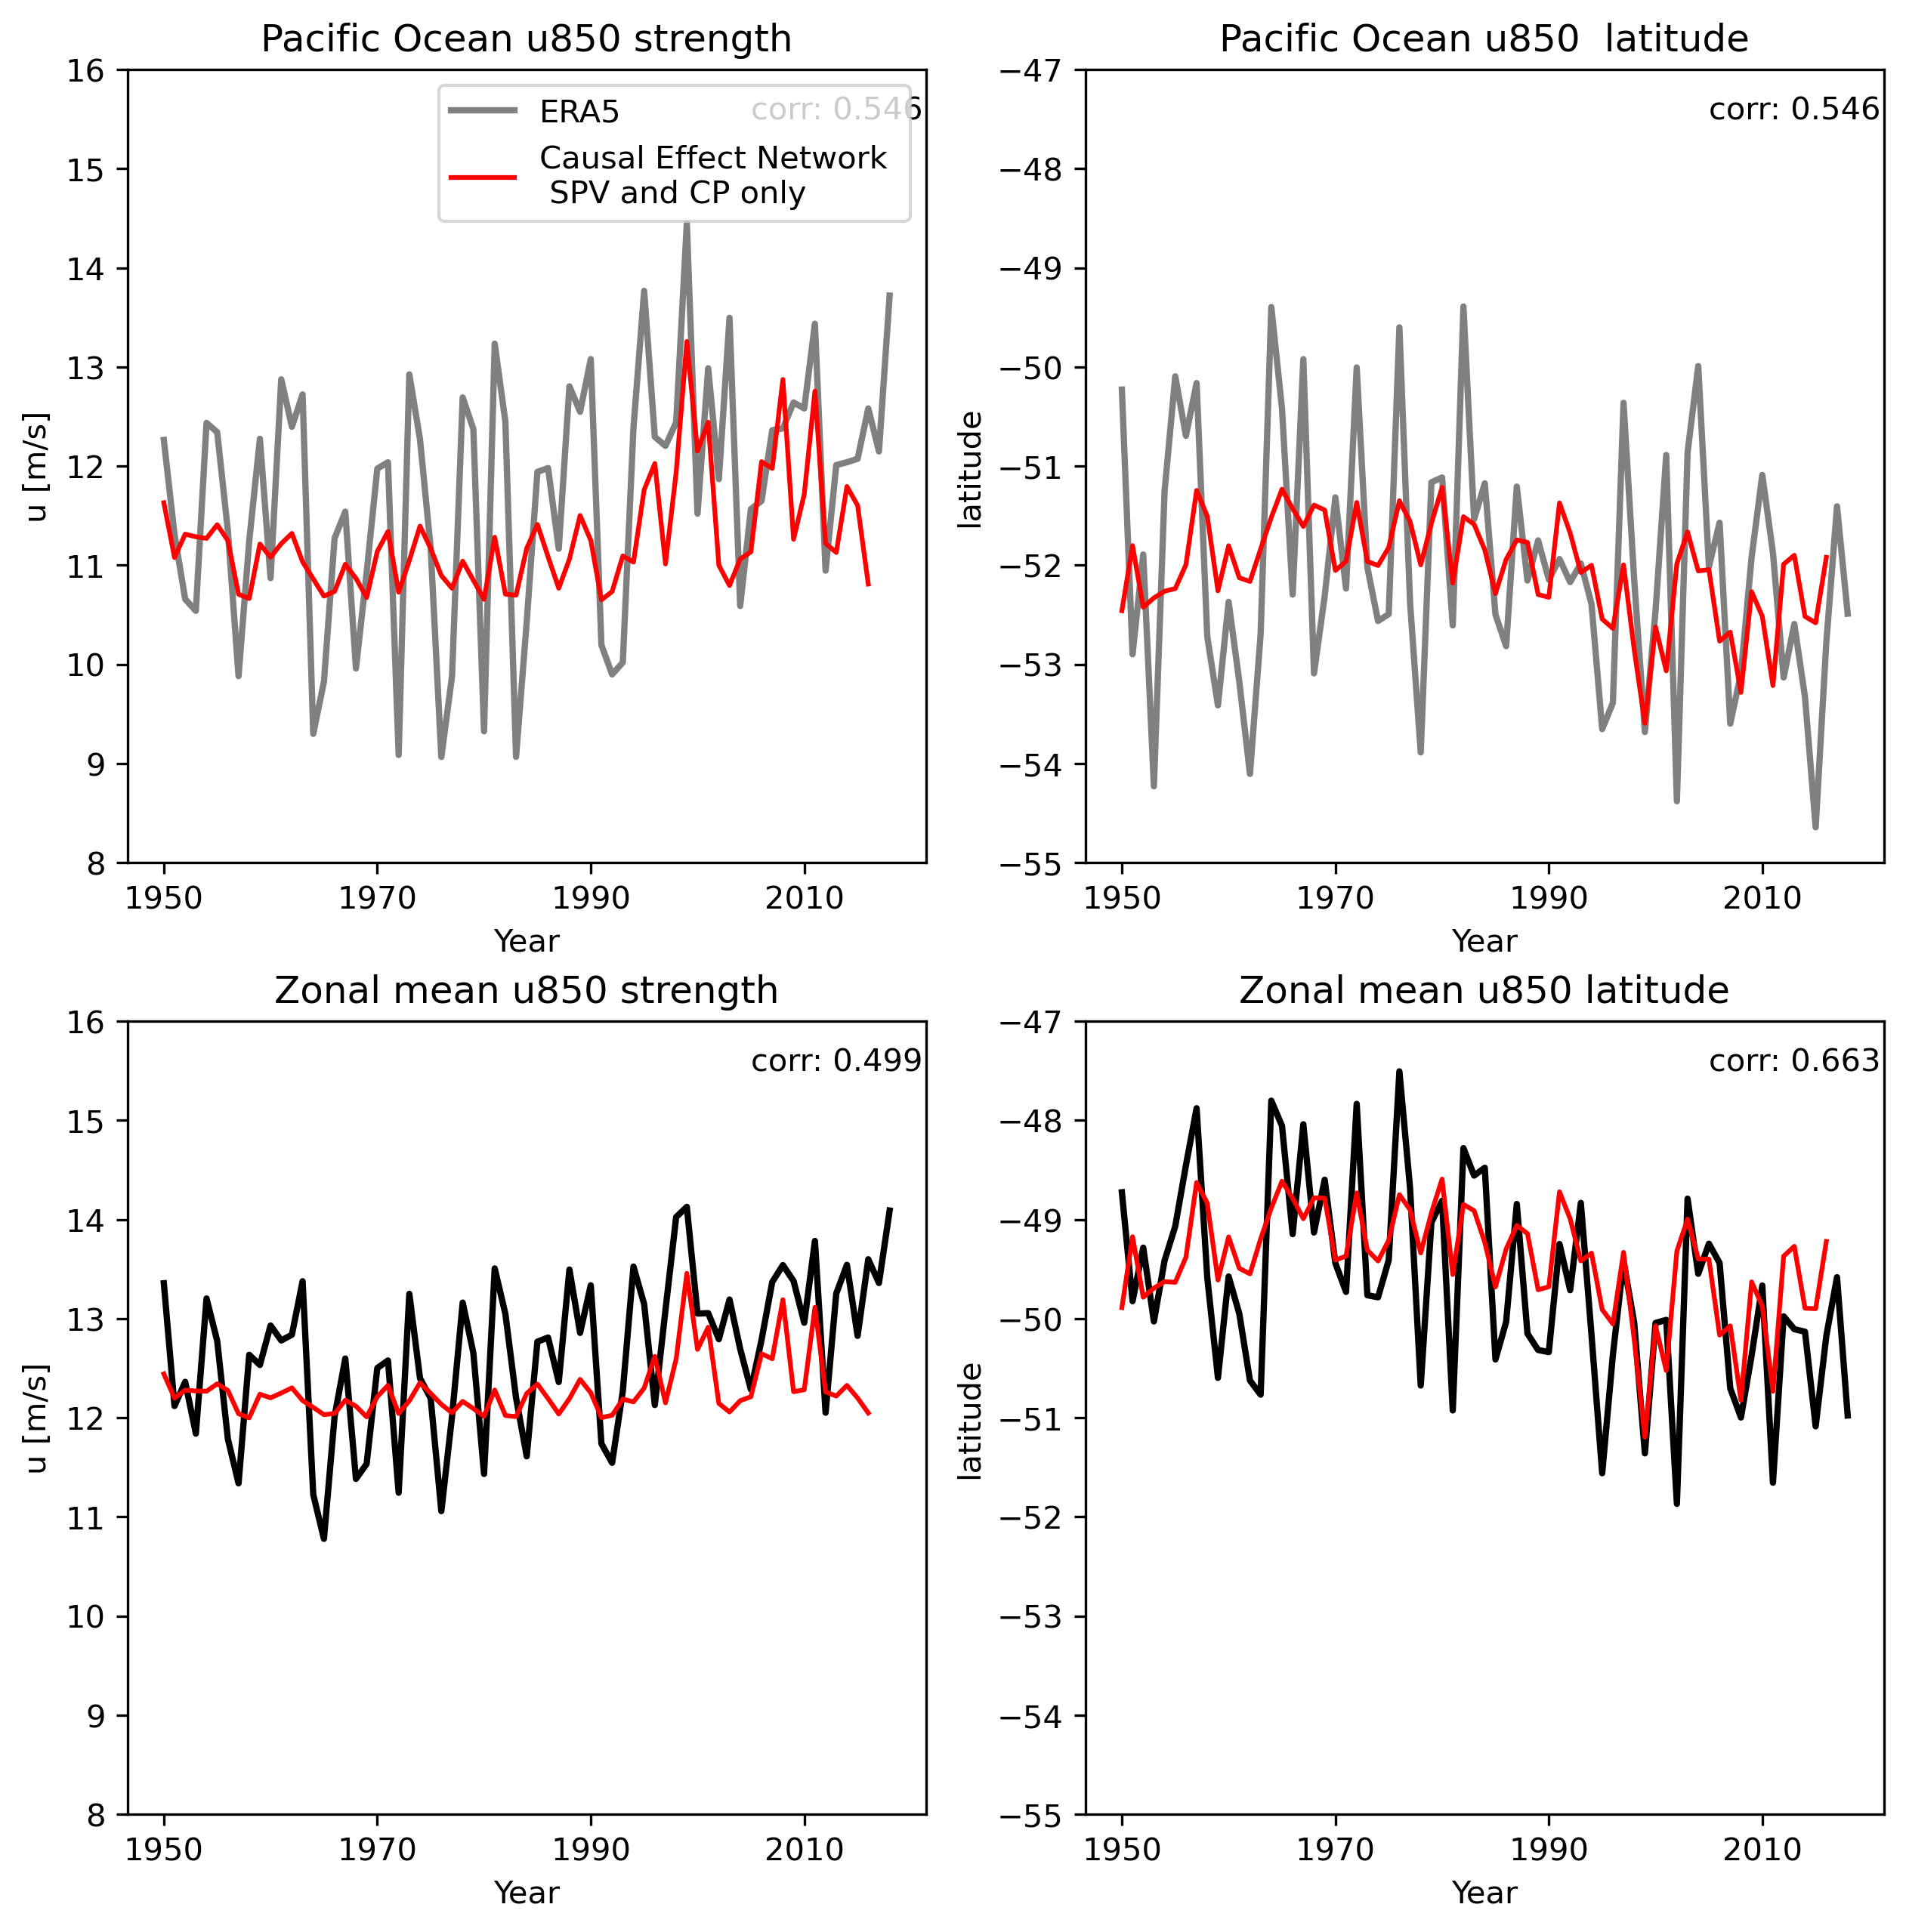

In [270]:
obs_lat_CP,obs_str_CP = mf.jet_lat_strength(u_1950_2018_DJF)
obs_lat_ZM,obs_str_ZM = mf.jet_lat_strength(u_1950_2018_DJF,0,360)
years = np.arange(1950,2021,20)
lat_CP,strength_CP = mf.jet_lat_strength(jet_recovered_obs_spv_cp)
lat_ZM,strength_ZM = mf.jet_lat_strength(jet_recovered_obs_spv_cp,0,360)

error_lat_CP_recov  =  lat_CP - obs_lat_CP
error_str_CP_recov  =  strength_CP - obs_str_CP

error_lat_ZM_recov  =  lat_ZM - obs_lat_ZM
error_str_ZM_recov  =  strength_ZM - obs_str_ZM

jet_recovered_obs_error = {}
jet_recovered_obs_error['CP_lat'] = error_lat_CP_recov
jet_recovered_obs_error['CP_str'] = error_str_CP_recov
jet_recovered_obs_error['ZM_lat'] = error_lat_ZM_recov
jet_recovered_obs_error['ZM_str'] = error_str_ZM_recov

plt.figure(figsize=(10,10),dpi=300) 
ax=plt.subplot(2,2,1)
ax.plot(obs_str_CP,label='ERA5',linewidth=2,color='grey')
ax.plot(strength_CP[:-2],color='red',label='Causal Effect Network \n SPV and CP only')
corr =  np.corrcoef(obs_str_CP,strength_CP)[0,1]
ax.text(55,15.5,'corr: '+str(round(corr,3)))
ax.set_xticks([0,20,40,60],[1950,1970,1990,2010])
ax.set_ylim(8,16)
ax.set_ylabel('u [m/s]')
ax.set_xlabel('Year')
ax.legend()
ax.set_title('Pacific Ocean u850 strength')
ax=plt.subplot(2,2,2)
ax.plot(obs_lat_CP,linewidth=2,color='grey')
ax.plot(lat_CP[:-2],color='red')
corr =  np.corrcoef(obs_str_CP,strength_CP)[0,1]
ax.text(55,-47.5,'corr: '+str(round(corr,3)))
ax.set_ylim(-55,-47)
ax.set_title('Pacific Ocean u850  latitude')
ax.set_xticks([0,20,40,60],[1950,1970,1990,2010])
ax.set_ylabel('latitude')
ax.set_xlabel('Year')
ax=plt.subplot(2,2,3)
ax.plot(obs_str_ZM,color='k',label='ERA5',linewidth=2)
ax.plot(strength_ZM[:-2],color='red',label='Causal Effect Network')
corr =  np.corrcoef(obs_str_ZM,strength_ZM)[0,1]
ax.text(55,15.5,'corr: '+str(round(corr,3)))
ax.set_ylim(8,16)
ax.set_title('Zonal mean u850 strength')
ax.set_xticks([0,20,40,60],[1950,1970,1990,2010])
ax.set_ylabel('u [m/s]')
ax.set_xlabel('Year')
ax=plt.subplot(2,2,4)
ax.plot(obs_lat_ZM,color='k',linewidth=2)
ax.plot(lat_ZM[:-2],color='red')
corr =  np.corrcoef(obs_lat_ZM,lat_ZM)[0,1]
ax.text(55,-47.5,'corr: '+str(round(corr,3)))
ax.set_ylim(-55,-47)
ax.set_title('Zonal mean u850 latitude')
ax.set_xticks([0,20,40,60],[1950,1970,1990,2010])
ax.set_ylabel('latitude')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

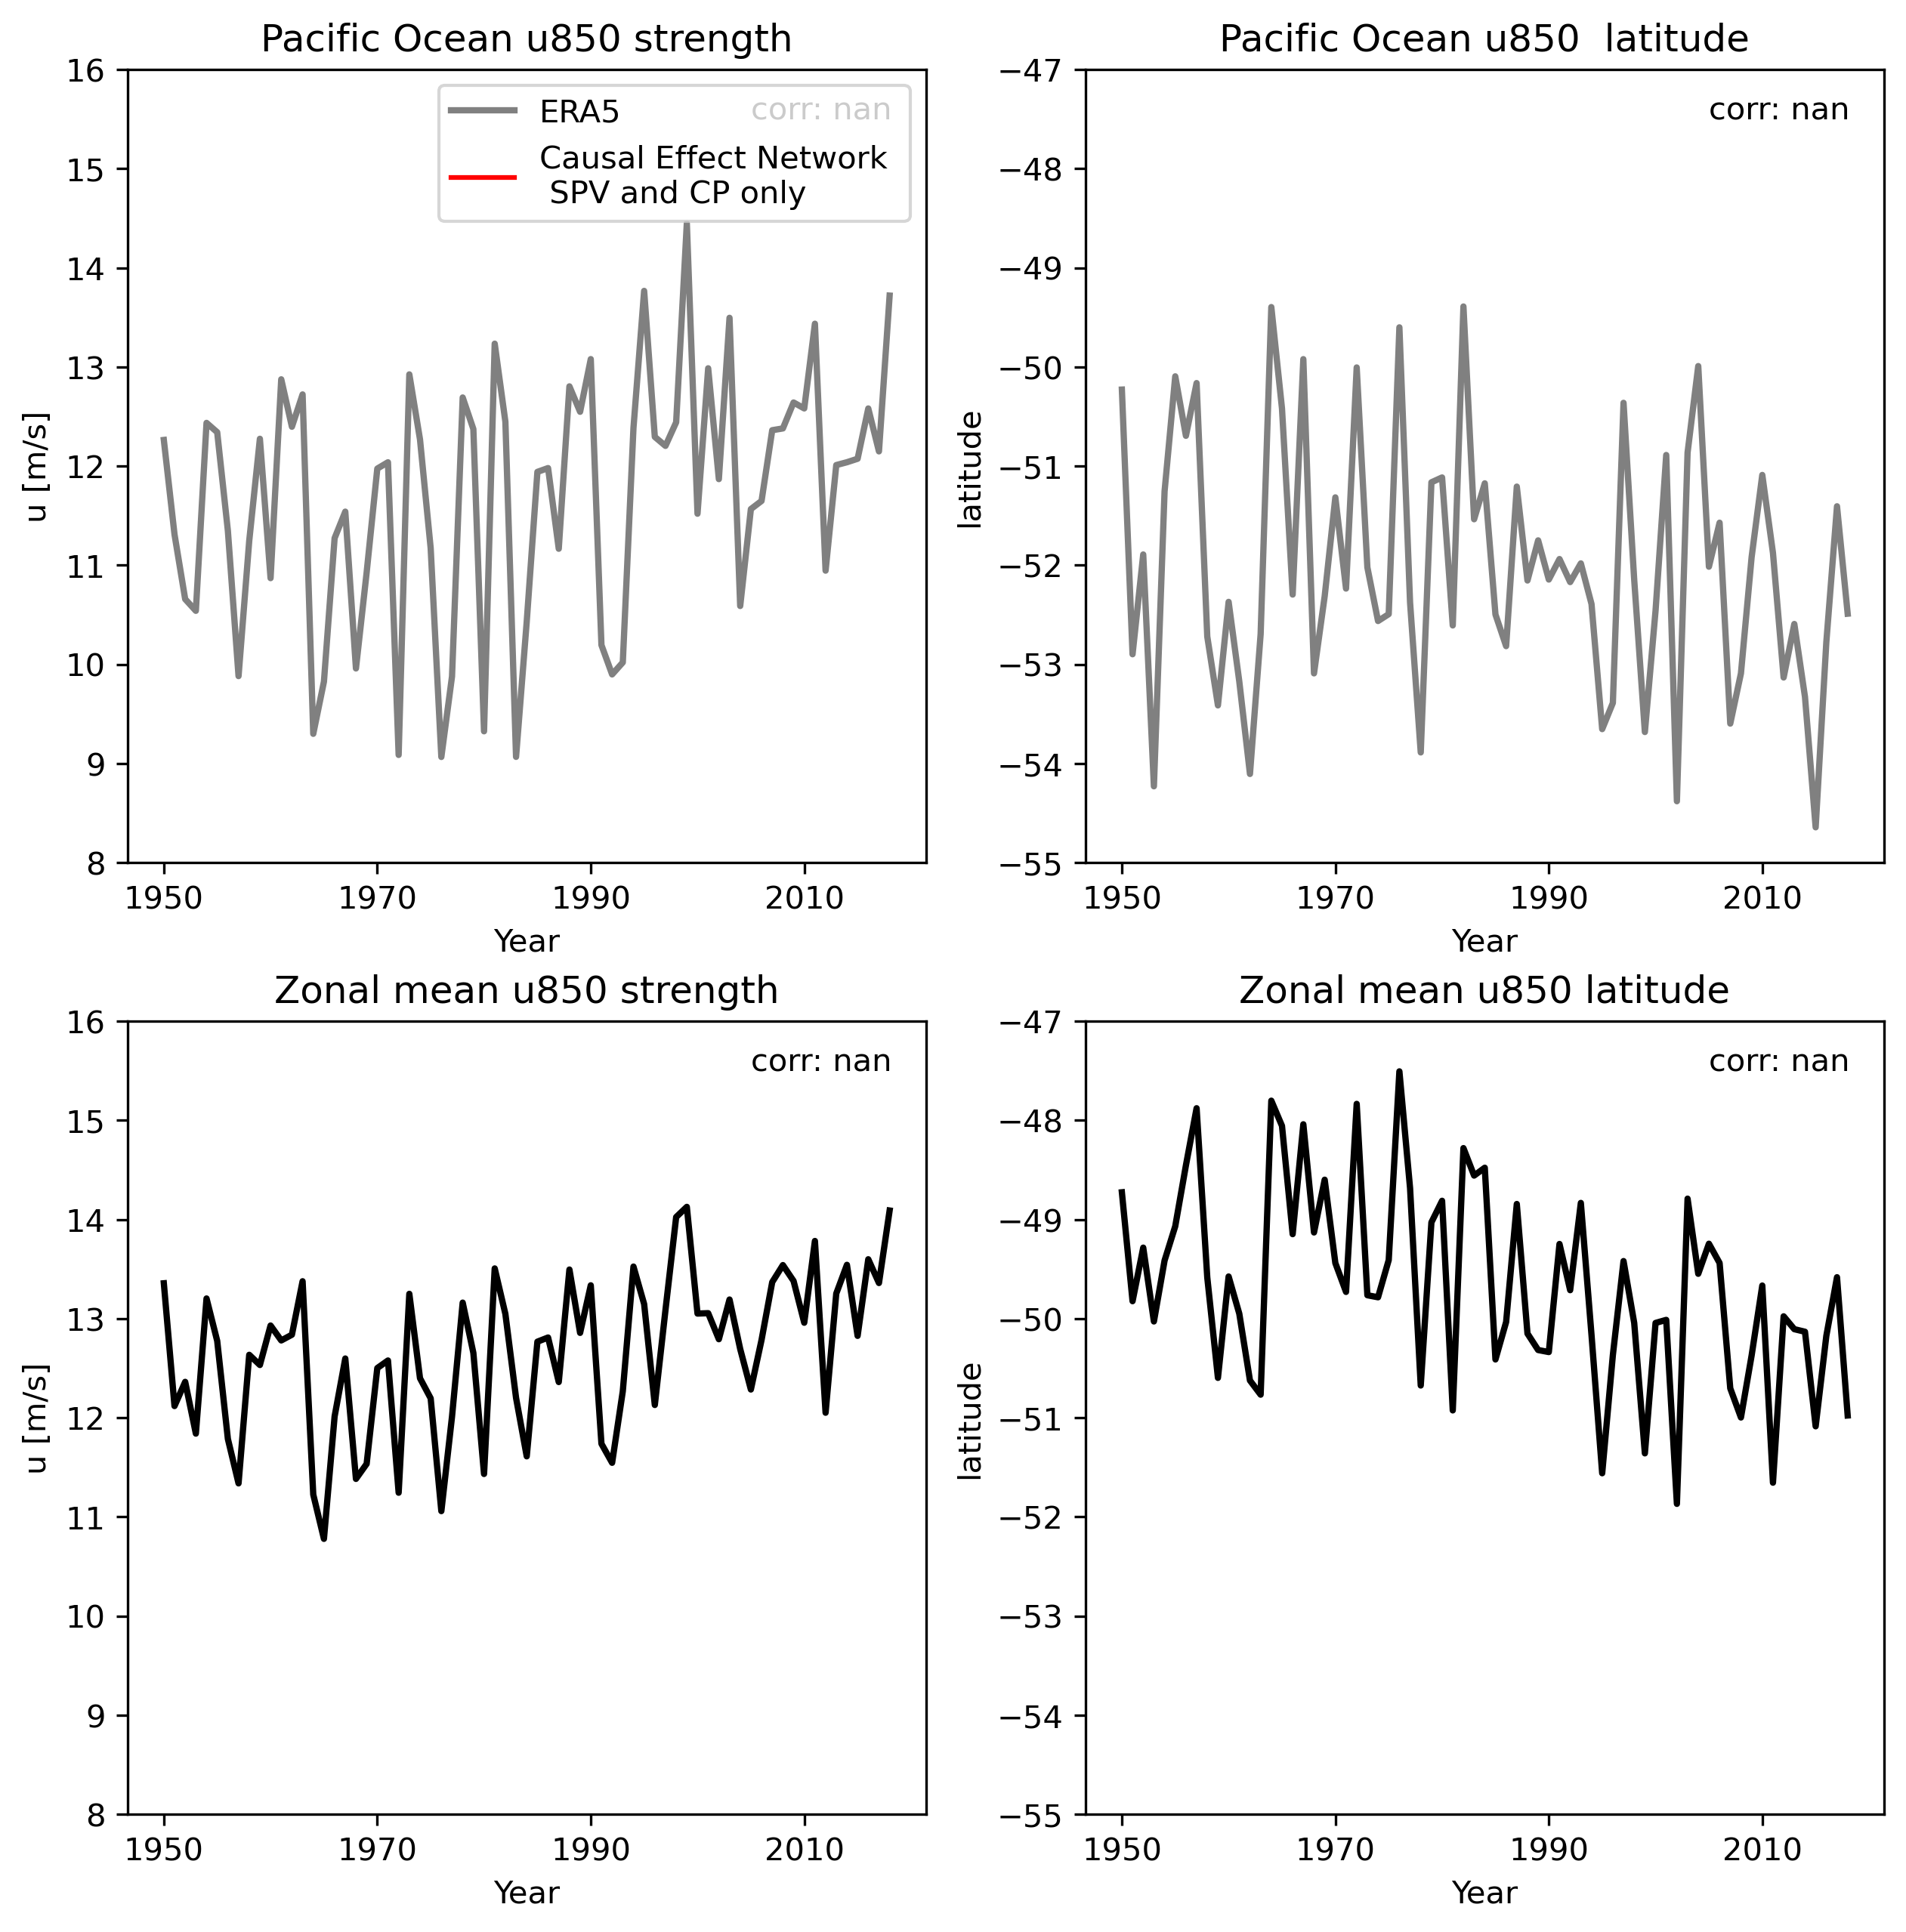

In [275]:
obs_lat_CP,obs_str_CP = mf.jet_lat_strength(u_1950_2018_DJF)
obs_lat_ZM,obs_str_ZM = mf.jet_lat_strength(u_1950_2018_DJF,0,360)
years = np.arange(1950,2021,20)
lat_CP,strength_CP = mf.jet_lat_strength(jet_recovered_obs_gw.sel(time=slice('1950','2018')))
lat_ZM,strength_ZM = mf.jet_lat_strength(jet_recovered_obs_gw.sel(time=slice('1950','2018')),0,360)

error_lat_CP_recov  =  lat_CP - obs_lat_CP
error_str_CP_recov  =  strength_CP - obs_str_CP

error_lat_ZM_recov  =  lat_ZM - obs_lat_ZM
error_str_ZM_recov  =  strength_ZM - obs_str_ZM

jet_recovered_obs_error = {}
jet_recovered_obs_error['CP_lat'] = error_lat_CP_recov
jet_recovered_obs_error['CP_str'] = error_str_CP_recov
jet_recovered_obs_error['ZM_lat'] = error_lat_ZM_recov
jet_recovered_obs_error['ZM_str'] = error_str_ZM_recov

plt.figure(figsize=(10,10),dpi=300) 
ax=plt.subplot(2,2,1)
ax.plot(obs_str_CP,label='ERA5',linewidth=2,color='grey')
ax.plot(strength_CP[:-2],color='red',label='Causal Effect Network \n SPV and CP only')
corr =  np.corrcoef(obs_str_CP,strength_CP)[0,1]
ax.text(55,15.5,'corr: '+str(round(corr,3)))
ax.set_xticks([0,20,40,60],[1950,1970,1990,2010])
ax.set_ylim(8,16)
ax.set_ylabel('u [m/s]')
ax.set_xlabel('Year')
ax.legend()
ax.set_title('Pacific Ocean u850 strength')
ax=plt.subplot(2,2,2)
ax.plot(obs_lat_CP,linewidth=2,color='grey')
ax.plot(lat_CP[:-2],color='red')
corr =  np.corrcoef(obs_str_CP,strength_CP)[0,1]
ax.text(55,-47.5,'corr: '+str(round(corr,3)))
ax.set_ylim(-55,-47)
ax.set_title('Pacific Ocean u850  latitude')
ax.set_xticks([0,20,40,60],[1950,1970,1990,2010])
ax.set_ylabel('latitude')
ax.set_xlabel('Year')
ax=plt.subplot(2,2,3)
ax.plot(obs_str_ZM,color='k',label='ERA5',linewidth=2)
ax.plot(strength_ZM[:-2],color='red',label='Causal Effect Network')
corr =  np.corrcoef(obs_str_ZM,strength_ZM)[0,1]
ax.text(55,15.5,'corr: '+str(round(corr,3)))
ax.set_ylim(8,16)
ax.set_title('Zonal mean u850 strength')
ax.set_xticks([0,20,40,60],[1950,1970,1990,2010])
ax.set_ylabel('u [m/s]')
ax.set_xlabel('Year')
ax=plt.subplot(2,2,4)
ax.plot(obs_lat_ZM,color='k',linewidth=2)
ax.plot(lat_ZM[:-2],color='red')
corr =  np.corrcoef(obs_lat_ZM,lat_ZM)[0,1]
ax.text(55,-47.5,'corr: '+str(round(corr,3)))
ax.set_ylim(-55,-47)
ax.set_title('Zonal mean u850 latitude')
ax.set_xticks([0,20,40,60],[1950,1970,1990,2010])
ax.set_ylabel('latitude')
ax.set_xlabel('Year')